# Introduction to Machine Learning - Final Project - Group 7

Almog Asraf - 313200511

Daniel Pidtylok - 322558867

Nir Levanon - 313160715

## Imports

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

from sklearn.metrics import roc_curve, auc, plot_roc_curve, confusion_matrix, plot_confusion_matrix, classification_report, RocCurveDisplay
from sklearn import set_config
set_config(display='diagram')


In [2]:
start_time = time.time()  # keep starting time to measure total running time

## Part A - Exploration

Import the train data and split to features & labels

In [3]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# X - all the data (the feature columns) , y - the label column - 0 or 1
X, y = data.iloc[:,:-1], data.iloc[:,-1]
train = X.drop('id',axis=1)
test = test_data.drop('id',axis=1)

train.head()

,closeness_to_holiday,B,Month,product_page_duration,BounceRates,info_page_duration,total_duration,device,num_of_admin_pages,num_of_product_pages,...,ExitRates,num_of_info_pages,D,user_type,Region,admin_page_duration,PageValues,A,Weekend,internet_browser
0,0.0,84.958154,Feb,0.0 minutes,0.20,0.0 minutes,NaN,1.0,0.0,1.0,...,0.20,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_1,0.0,safari_13
1,0.0,102.100162,Feb,64.0 minutes,0.00,0.0 minutes,NaN,2.0,0.0,2.0,...,0.10,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_2,0.0,chrome_89
2,0.0,100.991064,Feb,0.0 minutes,0.20,0.0 minutes,NaN,4.0,0.0,1.0,...,0.20,0.0,NaN,Returning_Visitor,9.0,0.0,0.0,c_3,0.0,safari_15
3,0.0,120.605525,Feb,2.666666667 minutes,0.05,0.0 minutes,NaN,3.0,0.0,2.0,...,0.14,0.0,NaN,Returning_Visitor,2.0,0.0,0.0,c_4,0.0,chrome_89
4,0.0,87.423708,Feb,627.5 minutes,0.02,0.0 minutes,NaN,3.0,NaN,10.0,...,0.05,0.0,NaN,Returning_Visitor,1.0,0.0,0.0,c_4,1.0,browser_3_v9


#### Initially, we present summary information on all the features. Next, we present "ID" for each feature and give our opinion on it.

As we can see, we have 10,497 records and 21 columns. No column is completely empty.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   closeness_to_holiday   9834 non-null   float64
 1   B                      10456 non-null  float64
 2   Month                  10458 non-null  object 
 3   product_page_duration  9872 non-null   object 
 4   BounceRates            10465 non-null  float64
 5   info_page_duration     10139 non-null  object 
 6   total_duration         5721 non-null   float64
 7   device                 10094 non-null  float64
 8   num_of_admin_pages     10031 non-null  float64
 9   num_of_product_pages   9962 non-null   float64
 10  C                      10461 non-null  object 
 11  ExitRates              10452 non-null  float64
 12  num_of_info_pages      9821 non-null   float64
 13  D                      109 non-null    float64
 14  user_type              10455 non-null  object 
 15  Re

In [5]:
train.shape

(10479, 21)

There are a lot of Null values in "D" and "total_duration" columns

In [6]:
train.isnull().sum()

closeness_to_holiday       645
B                           23
Month                       21
product_page_duration      607
BounceRates                 14
info_page_duration         340
total_duration            4758
device                     385
num_of_admin_pages         448
num_of_product_pages       517
C                           18
ExitRates                   27
num_of_info_pages          658
D                        10370
user_type                   24
Region                      18
admin_page_duration        667
PageValues                  14
A                          389
Weekend                     23
internet_browser           644
dtype: int64

#### Total distribution of purchases

As we can see, most of the sessions ended without purchases

<function matplotlib.pyplot.show(close=None, block=None)>

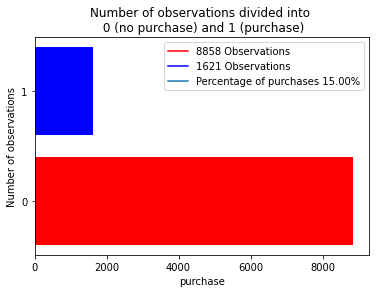

In [7]:
zero_df = data[data['purchase']==0]
zero_num = zero_df["id"].shape[0]
one_df = data[data['purchase']==1]
one_num = one_df["id"].shape[0]
total_num = data.shape[0]
one_per = round(one_num/ total_num, 2)*100
plt.figure()
names = ['0', '1']
values = [zero_num, one_num]
plt.barh(names, values, color=['red','blue'])
plt.plot([0, 0], [0, 0], color='red', linestyle='-', label='%d Observations' % zero_num)
plt.plot([0, 0], [0, 0], color='blue', linestyle='-', label='%d Observations' % one_num)
plt.plot([0, 0], [0, 0], label='Percentage of purchases %.2f' % one_per + '%')
plt.xlabel('purchase')
plt.ylabel('Number of observations')
plt.title('Number of observations divided into \n 0 (no purchase) and 1 (purchase)') 
plt.legend()
plt.show

Heat map of the correlation between the numerical columns.
It can be seen that there is a high correlation:
* Between ExitRates and BounceRates - 0.91 correlation
* Between num_of_product_pages and total_duration - 0.87 correlation .

We mention that this is an analysis of the data as it is, and that there may be changes after pre-processing.

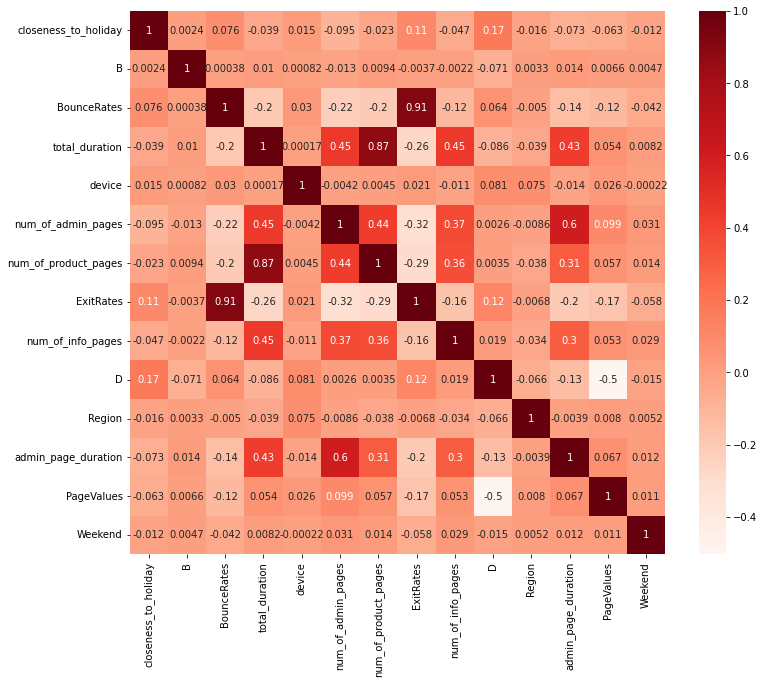

In [8]:
plt.figure(figsize=(12,10))
train_cor = train.corr()
sns.heatmap(train_cor,
            annot=True,
            cmap=plt.cm.Reds,
            xticklabels=train_cor.columns,
            yticklabels=train_cor.columns)
plt.show()

#### Data visualization functions

Individual functions - for a single graph (and not an entire "ID")

In [9]:
# Distribution plot
def categorical_distribution(df, col):
    plt.figure(figsize=(6,5))
    df[col].value_counts().head(15).plot.barh()
    return plt.show

def continuous_distribution(df, col):
    plt.figure(figsize=(6,5))
    df[col].hist()
    return plt.show

# Distribution - divided into purchase result (0 or 1)
def continuous_results_by_column (df, col):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    newdf = df.select_dtypes(include=numerics)
    zero_df = newdf[newdf['purchase']==0]
    one_df = newdf[newdf['purchase']==1]
    num_of_bins = 1000
    plt.figure()
    fig, ax = plt.subplots()
    ax.hist(zero_df[col], bins=num_of_bins, color='red')
    ax.hist(one_df[col], bins=num_of_bins, color='blue')
    ax.set_title(f'column is {col}')
    plt.plot([0, 0], [0, 0], color='red', linestyle='-', label='Number 0: %d Observations' % zero_df[col].count())
    plt.plot([0, 0], [0, 0], color='blue', linestyle='-', label='Number 1: %d Observations' % one_df[col].count())
    plt.legend()
    return plt.show()

# Categorical distribution - divided into purchase result (0 or 1)
def categorical_results_by_column (df, col):
    newdf = df.copy()
    zero_df = newdf[newdf['purchase']==0]
    one_df = newdf[newdf['purchase']==1]
    z = zero_df[col].value_counts().head(15)
    o = one_df[col].value_counts().head(15)
    pd.DataFrame({('Number 0: %d Observations' % zero_df[col].count()) : z,
                    ('Number 1: %d Observations' % one_df[col].count()): o},
                   index=z.index).plot.barh(color={"red","blue"}, stacked=True)
    return plt.show()

# Distribution of missing values by divided into purchase result (0 or 1)
def results_by_null(df, col):
    zero_df = df[df['purchase']==0]
    zero_num = zero_df[df[col].isna()].shape[0]
    one_df = df[df['purchase']==1]
    one_num = one_df[df[col].isna()].shape[0]
    plt.figure()
    names = ['0', '1']
    values = [zero_num, one_num]
    plt.barh(names, values, color=['red','blue'])
    plt.plot([0, 0], [0, 0], color='red', linestyle='-', label='%d Observations' % zero_num)
    plt.plot([0, 0], [0, 0], color='blue', linestyle='-', label='%d Observations' % one_num)
    plt.xlabel('purchase')
    plt.ylabel('Number of null observations')
    plt.title('Number of null observations in %s column \n divided into 0 (no purchase) and 1 (purchase)' %col) 
    plt.legend()
    plt.show

# Box plot chart
def boxplot(df):
    print('Box plot of all features:')
    df.plot.box(figsize=(20,10), patch_artist=True)
    return plt.show()

def boxplot_col(df, col_box):
    plt.figure(figsize=(6,5))
    df.boxplot(column=col_box)
    plt.plot([1], [0], label=df.describe()[col_box]) 
    plt.legend() 
    return plt.show()

# Scatter plot - for observe relationships between variables
def Scatter (df, col1, col2):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(df[col1], df[col2])
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    return plt.show()

# The number of records for each category in a categorical column
def groupby_categorical (df, col):
    return df.groupby(col).size()

# The number of outliers by IQR
def IQR_col (df):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

"ID" Functions - Functions for building an ID card for each column 

In [10]:
# ID Card - for a numeric column
def numeric_column_ID (data, X, col):
    fig, axs = plt.subplots(figsize = (13,7), nrows=2, ncols=3)
    
    # Location:[0,0] - Summary of the data
    
    # Describe the data
    summary = str(X.describe()[col])
    
    # Percentage of null cells
    Null = X[col].isnull().sum()
    rows = X.shape[0] 
    ratio_null = round((float(Null/rows)*100), 5)
    info_null = 'Percentage of Null cells: \n %d / %d --> %.2f' % (Null, rows, ratio_null) + "%"
    
    # Percentage of unique cells
    unique = X[col].nunique()
    ratio_unique = round((float(unique/rows)*100), 5)
    info_unique = 'Percentage of unique cells: \n %d / %d --> %.2f' % (unique, rows, ratio_unique) + "%"
    
    # Plot
    axs[0, 0].set_title('Summary')
    axs[0, 0].plot([0, 0], [5, 5], label = summary)
    axs[0, 0].plot([0, 0], [5, 5], label = info_null)
    axs[0, 0].plot([0, 0], [5, 5], label = info_unique)
    axs[0, 0].legend(fontsize = 10, loc='center')
    
    # Location:[0,1] - Distribution of the data 
    axs[0, 1].hist(X[col])
    axs[0, 1].set_title('Distribution')
    
    # Location:[0,2] - Distribution of the data divided into purchase result 
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    newdf = data.select_dtypes(include=numerics)
    zero_df = newdf[newdf['purchase']==0]
    one_df = newdf[newdf['purchase']==1]
    num_of_bins = 100
    axs[0, 2].hist(zero_df[col], bins=num_of_bins, color='red')
    axs[0, 2].hist(one_df[col], bins=num_of_bins, color='blue')
    axs[0, 2].set_title('Distribution divided into \n 0 (no purchase) and 1 (purchase)')
    axs[0, 2].plot([0, 0], [0, 0], color='red', linestyle='-', label='Number 0: \n %d Observations' % zero_df[col].count())
    axs[0, 2].plot([0, 0], [0, 0], color='blue', linestyle='-', label='Number 1: \n %d Observations' % one_df[col].count())
    axs[0, 2].legend()
    
    # Location:[1,0] - Number of null observations divided into purchase result 
    zero_df = data[data['purchase']==0]
    zero_num = zero_df[data[col].isna()].shape[0]
    one_df = data[data['purchase']==1]
    one_num = one_df[data[col].isna()].shape[0]
    names = ['0', '1']
    values = [zero_num, one_num]
    axs[1, 0].barh(names, values, color=['red','blue'])
    axs[1, 0].plot([0, 0], [0, 0], color='red', linestyle='-', label='%d Observations' % zero_num)
    axs[1, 0].plot([0, 0], [0, 0], color='blue', linestyle='-', label='%d Observations' % one_num)
    axs[1, 0].set_xlabel('Number of null observations')
    axs[1, 0].set_ylabel('purchase')
    axs[1, 0].set_title('Number of null observations divided into \n 0 (no purchase) and 1 (purchase)')
    axs[1, 0].legend()
    
    # Location:[1,1] - Scatter plot for highly correlated variables (>0.8)
    cor = X.corr()
    cor_relevant = cor[((cor[col] > 0.8)  & (cor[col] < 1)) | (cor[col] < -0.8)]
    col2 = cor_relevant.index.tolist()
    if len(col2) > 0:
        axs[1, 1].scatter(X[col], X[col2[0]])
        axs[1, 1].set_xlabel(col)
        axs[1, 1].set_ylabel(col2[0])
        axs[1, 1].set_title('High Correlation')
    else:
        axs[1, 1].legend(title="No high correlation with any other feature" ,loc='center')
        axs[1, 1].set_title('High Correlation')
        
    # Location:[2,2] - Boxplot
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    num_iqr = str(((X[col] < (Q1 - 1.5 * IQR)) | (X[col] > (Q3 + 1.5 * IQR))).sum())
    info_iqr = "Number of outliers \n by IQR:  " + num_iqr
    X.boxplot(col)
    axs[1, 2].set_title('Boxplot')
    axs[1, 2].legend(title=info_iqr , loc='upper left')

    plt.suptitle("%s - ID" %(col), fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=0.89)
    plt.show()


# ID Card - for a categorical column
def categorical_column_ID (data, X, col):
    fig, axs = plt.subplots(figsize = (13 ,4), nrows=1, ncols=3)
    
    # Location:[0] - Summary of the data

    # Describe the data
    summary = str(X.groupby(col).size())
    
    # Percentage of null cells
    Null = X[col].isnull().sum()
    rows = X.shape[0] 
    ratio_null = round((float(Null/rows)*100), 5)
    info_null = 'Percentage of Null cells: \n %d / %d --> %.2f' % (Null, rows, ratio_null) + "%"
    
    # Percentage of unique cells
    unique = X[col].nunique()
    ratio_unique = round((float(unique/rows)*100), 5)
    info_unique = 'Percentage of unique cells: \n %d / %d --> %.2f' % (unique, rows, ratio_unique) + "%"
    
    # Plot
    axs[0].set_title('Summary')
    axs[0].plot([0, 0], [5, 5], label = summary)
    axs[0].plot([0, 0], [5, 5], label = info_null)
    axs[0].plot([0, 0], [5, 5], label = info_unique)
    axs[0].legend(fontsize = 10, loc='center')
       
    # Location:[0,1] - Distribution of the data divided into purchase result 
    newdf = data.copy()
    zero_df = newdf[newdf['purchase']==0]
    one_df = newdf[newdf['purchase']==1]
    z = zero_df[col].value_counts().head(15)
    o = one_df[col].value_counts().head(15)
    names_z = z.index.tolist()
    names_o = o.index.tolist()
    
    # For best visualization, we define numeric categories names as "object" type.
    if not X.dtypes[col] == 'object':
        for i in range(len(names_z)):
            names_z[i] = str(names_z[i])
        for i in range(len(names_o)):
            names_o[i] = str(names_o[i])
            
    axs[1].barh(names_z, z, color='red')
    axs[1].barh(names_o, o, color='blue')

    axs[1].set_title('Distribution divided into \n 0 (no purchase) and 1 (purchase)')
    axs[1].plot([0, 0], [0, 0], color='red', linestyle='-', label='Number 0: \n %d Observations' % zero_df[col].count())
    axs[1].plot([0, 0], [0, 0], color='blue', linestyle='-', label='Number 1: \n %d Observations' % one_df[col].count())
    axs[1].legend()
    
    # Location:[1,1] - Number of null observations divided into purchase result 
    zero_df = data[data['purchase']==0]
    zero_num = zero_df[data[col].isna()].shape[0]
    one_df = data[data['purchase']==1]
    one_num = one_df[data[col].isna()].shape[0]
    names = ['0', '1']
    values = [zero_num, one_num]
    axs[2].barh(names, values, color=['red','blue'])
    axs[2].plot([0, 0], [0, 0], color='red', linestyle='-', label='%d Observations' % zero_num)
    axs[2].plot([0, 0], [0, 0], color='blue', linestyle='-', label='%d Observations' % one_num)
    axs[2].set_xlabel('Number of null observations')
    axs[2].set_ylabel('purchase')
    axs[2].set_title('Number of null observations divided into \n 0 (no purchase) and 1 (purchase)')
    axs[2].legend()
    
    plt.suptitle("%s - ID" %(col), fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=0.75)
    plt.show()

#### Boxplot

We cannot say that the error is uniform.
Next, we present boxplot of each feature

Box plot of all features:


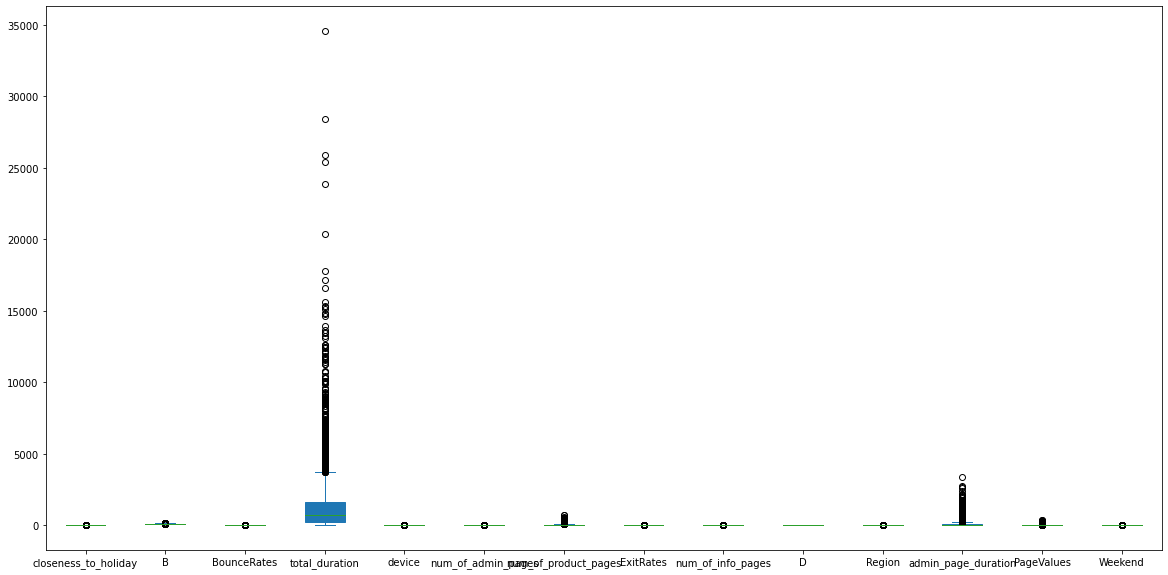

In [11]:
boxplot(train)

####  Exploration on closeness_to_holiday
How close was the session to a special day (like black Friday) or a holiday (like Passover)?
* We can see that this feature is divided into numeric categories . The maximum closeness to holiday is 1 day, and the minimum is 0 days. (the session itself is in holiday).
* We can see that most of the sessions are on holidays.

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


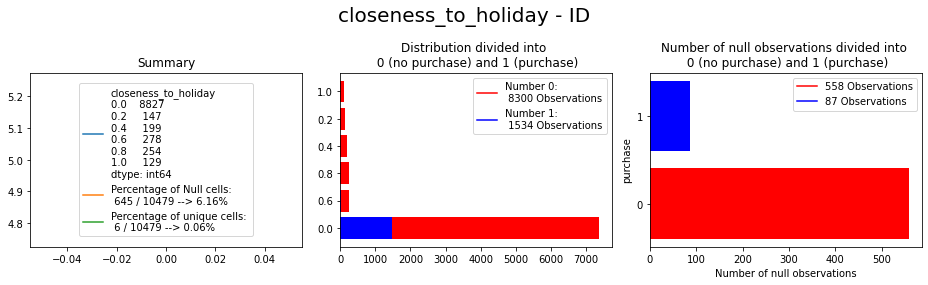

In [12]:
categorical_column_ID (data, train, "closeness_to_holiday")

####  Exploration on B

An nonymous column -  has a normal distribution with mean that is approximately 100 and std that is approximately 10.


d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


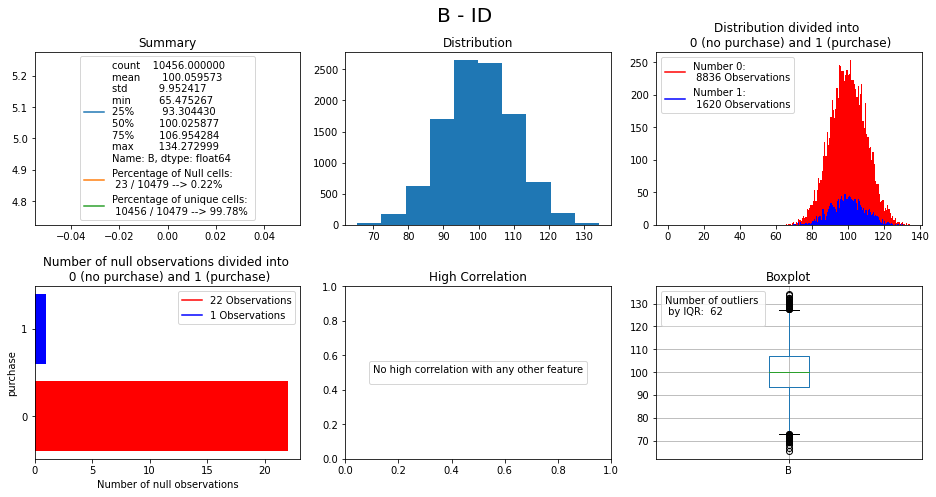

In [13]:
numeric_column_ID (data, train, "B")

####  Exploration on BounceRates
Google Analytics measure for percentage of users who enter the site from a specific page and then leave.
* Most observations are between 0 and 0.017.
* There are about 12% outliers according to IQR. 
* As we know, there is high correlation with ExitRates.

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


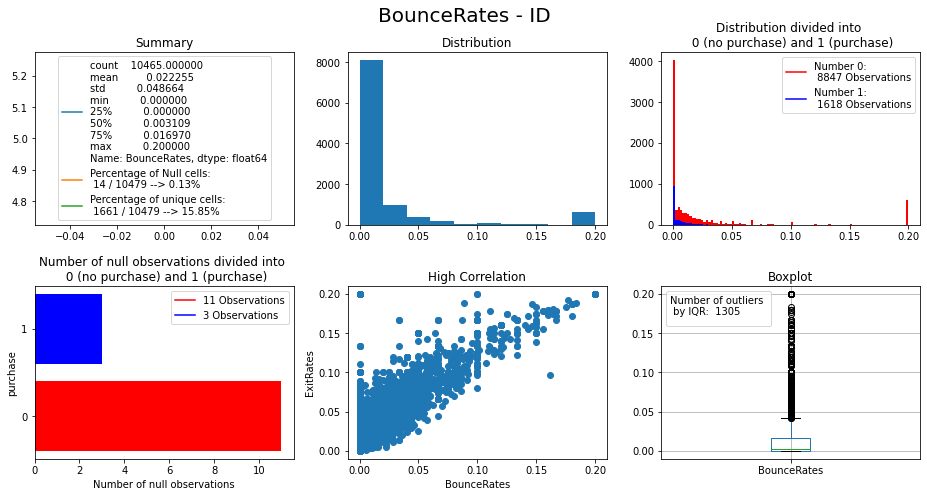

In [14]:
numeric_column_ID (data, train, "BounceRates")

####  Exploration on total_duration

The total duration of the session.
* Most of the total durations of the sessions are between 0 to 5000.
* Note: 5000 minutes is maybe too long for a session - irrelevant record?
* There are about 45% null values - we handle it in pre-processing.
* As we know, there is high correlation with num_of_product_pages.

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


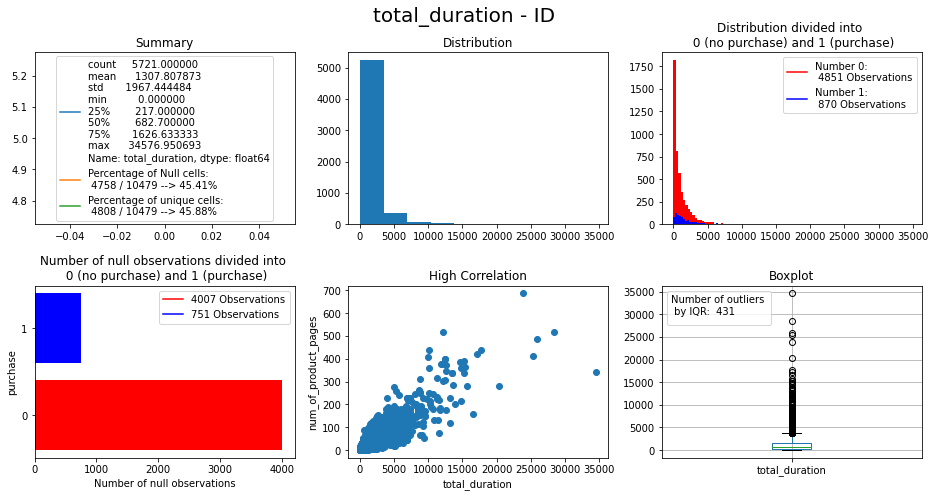

In [15]:
numeric_column_ID (data, train, "total_duration")

####  Exploration on num_of_admin_pages

The number of administrative pages (such as “profile settings”) the user visited during his session.
From the plot, we can to infer that the distribution of the number of admin pages is a power-law distribution.
As we can see from above, there are 1772 values, the mean equals to 2.23 and the std is 3.33.


d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


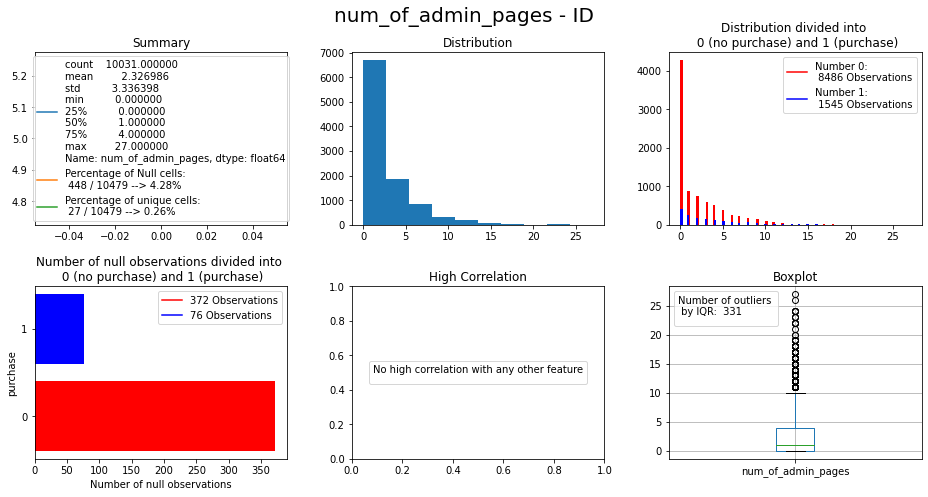

In [16]:
numeric_column_ID (data, train, "num_of_admin_pages")

####  Exploration on num_of_product_pages

The number of product-related pages (such as “product tech specs”) the user visited during his session.
* We understand from the plot below that most of the users are visiting between 0-100 pages.
* As we know, there is high correlation with total_duration.

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


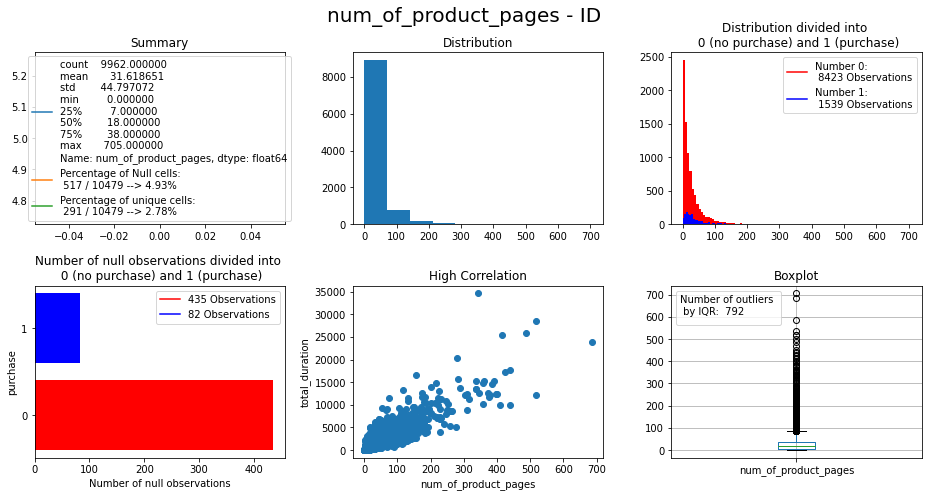

In [17]:
numeric_column_ID (data, train, "num_of_product_pages")

####  Exploration on ExitRates

Google Analytics measure for percentage of users who left the site from a specific page.
As we know, there is high correlation with BounceRates.


d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


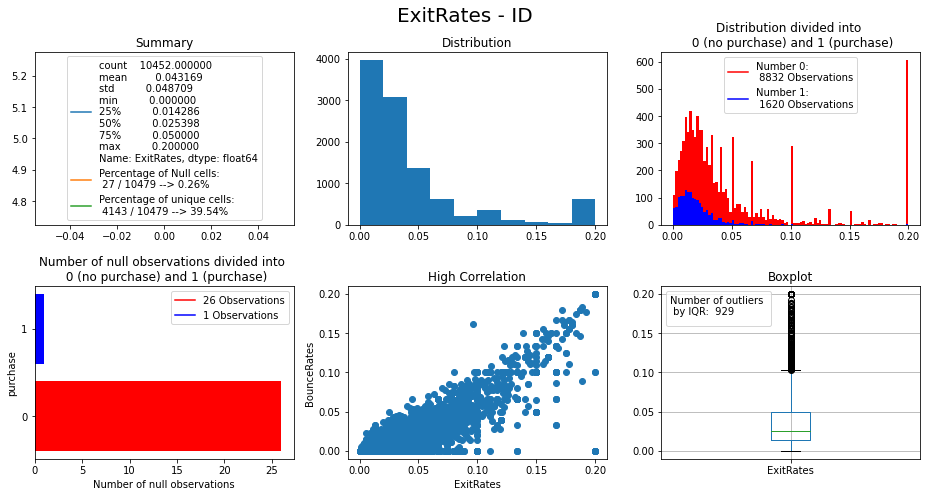

In [18]:
numeric_column_ID (data, train, "ExitRates")

####  Exploration on num_of_info_pages

The number of information pages (such as “refund policy”) the user visited during his session.
* As we can see from the plot below, most of the users don't visit the information pages.
* There are about 21% outliers according to IQR. 


d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


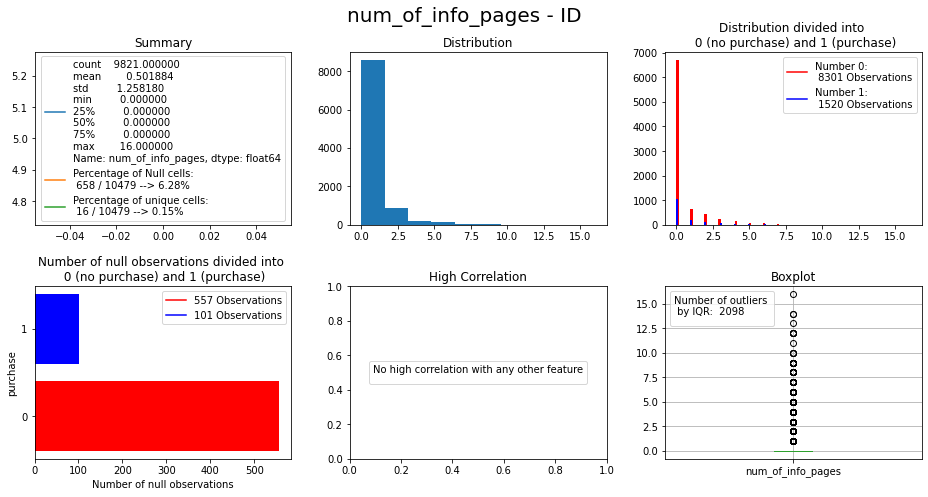

In [19]:
numeric_column_ID (data, train, "num_of_info_pages")

####  Exploration on D

An nonymous column.
* We assume that there are two Gaussians:
* One for purchases made (1) - between ~ -0.1 and 2.
* The second for purchases not made (0) - between ~ 1 and 8.
* There are 98% missing entries, but a relatively clear division between the labels. 


d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


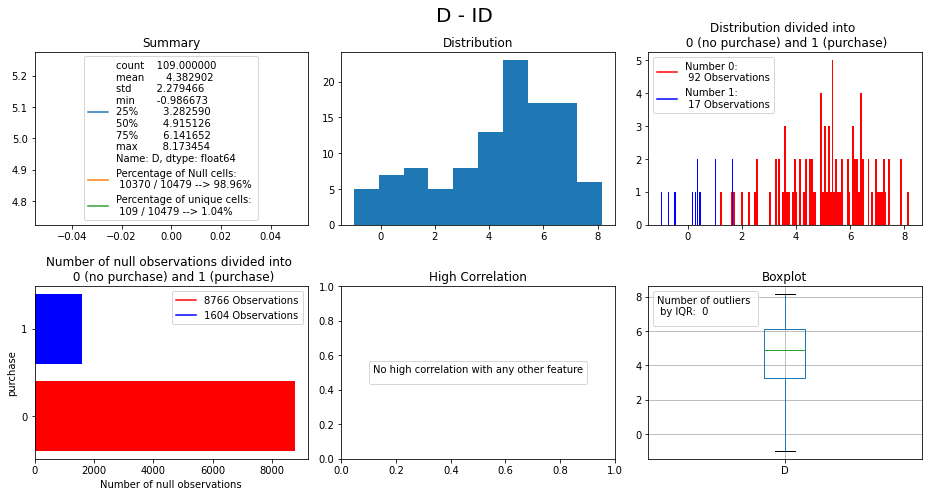

In [20]:
numeric_column_ID (data, train, "D")

####  Exploration on admin_page_duration
Duration of time spent on administrative pages.
* As we can see, most of the users don't visit administrative pages, maybe because most of the users aren't admins. 
* Those who are (there are approximately 200), visit them a lot (250-500 times).

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


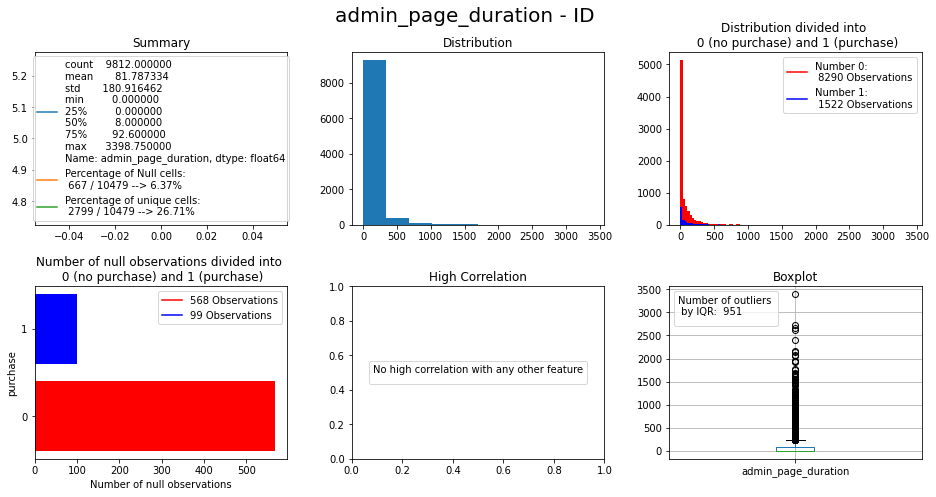

In [21]:
numeric_column_ID (data, train, "admin_page_duration")

####  Exploration on PageValues

Google Analytics measure. Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both).

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


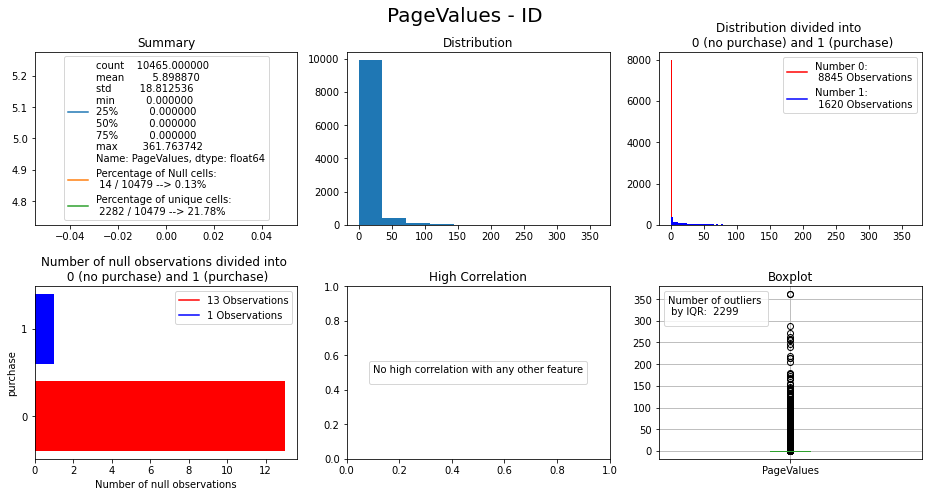

In [22]:
numeric_column_ID (data, train, "PageValues")

####  Exploration on Month

* The most popular months are May, November (Black Friday, Thanksgiving), March, Dec (Christmas). 
* In November - the number of purchases is highest.

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


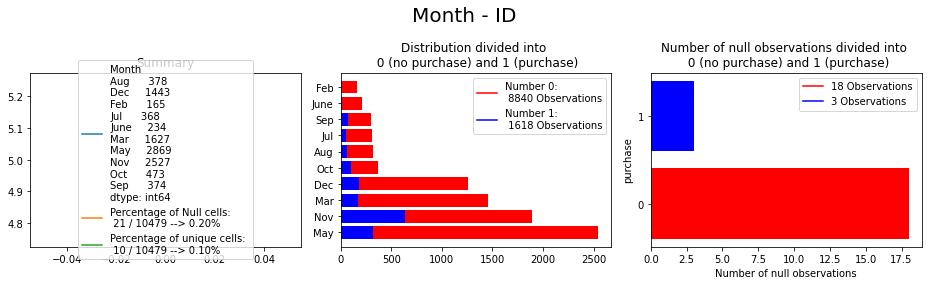

In [23]:
categorical_column_ID (data, train, "Month")

####  Exploration on device

Device that the user used for the session. 
* We can't understand what each number in this column represnts, but we assume that there are 8 possible devices.
* Most of the users use devices no. 1, 2 and 3.
* The most popular device with the highest number of purchases is "2".


d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


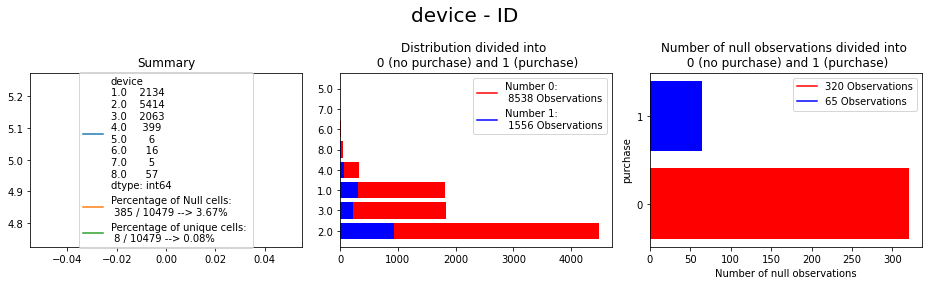

In [24]:
categorical_column_ID (data, train, "device")

####  Exploration on C
An nonymous column.
* There are 6 categories.
* It is possible that these are communication messages - HTTP status. 
* The most popularity message is "202", meaning "Accepted".

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


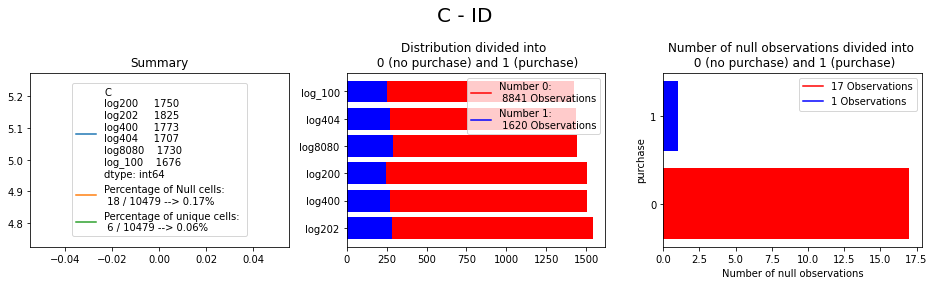

In [25]:
categorical_column_ID (data, train, "C")

####  Exploration on user_type

Most users are returning users, and these also make the highest number of purchases.

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


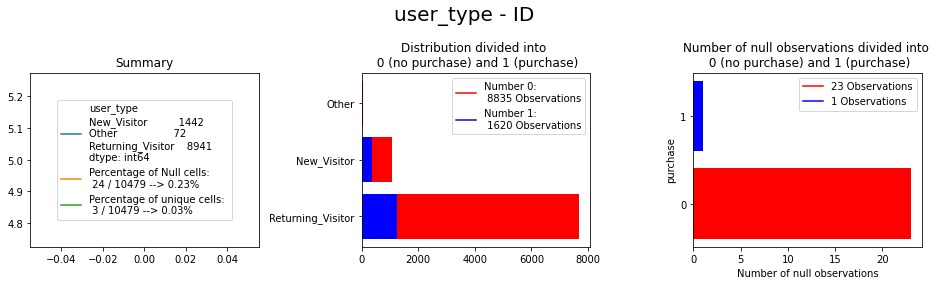

In [26]:
categorical_column_ID (data, train, "user_type")

####  Exploration on Region

Geographic origin of user IP.
From the plot below, we understand that most of the users are from region 1 and 3.

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


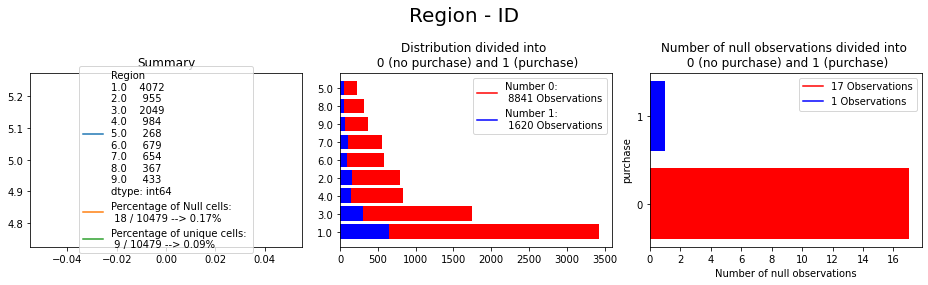

In [27]:
categorical_column_ID (data, train, "Region")

####  Exploration on A

As we can see above, the type data is a "object", but it can be more appropriately for a continuous distribution.
In the pre-processing we will "clear" the prefix "c_" and treat it as a numeric column.

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


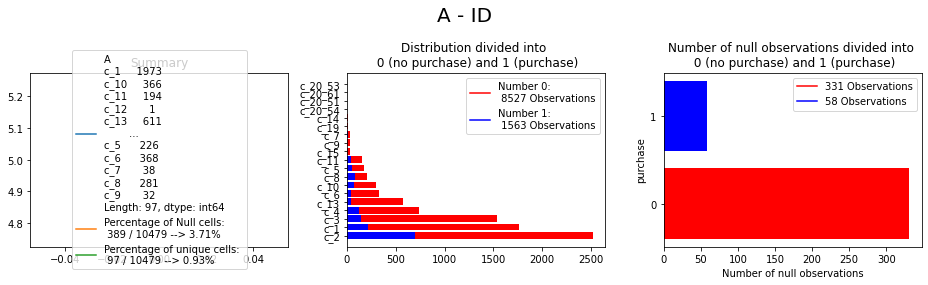

In [28]:
categorical_column_ID (data, train, "A")

####  Exploration on Weekend

Was the session made during the weekend or not?
As we can see, this is a binary feature. Most of the sessions aren't made during the weekend.
Maybe there are promotions during the week or maybe they should make promotions during the weekend.

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


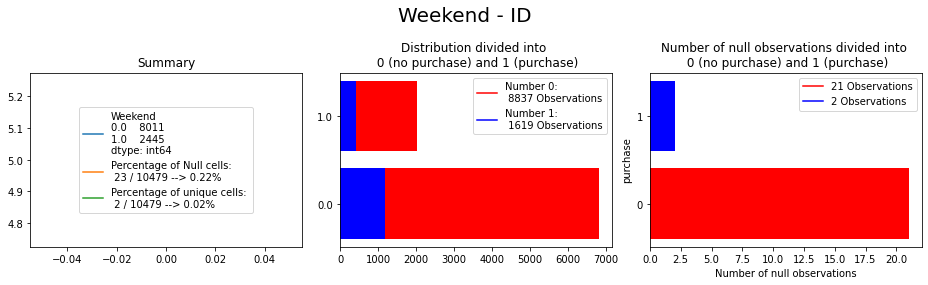

In [29]:
categorical_column_ID (data, train, "Weekend")

####  Exploration on internet_browser
Each column name consists of the browser name and version, so there are 125 unique entries.
In the pre-processing, we will separate the browser name and the version. We assume that significant factor is the browser name, and hence we will remove the version.

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


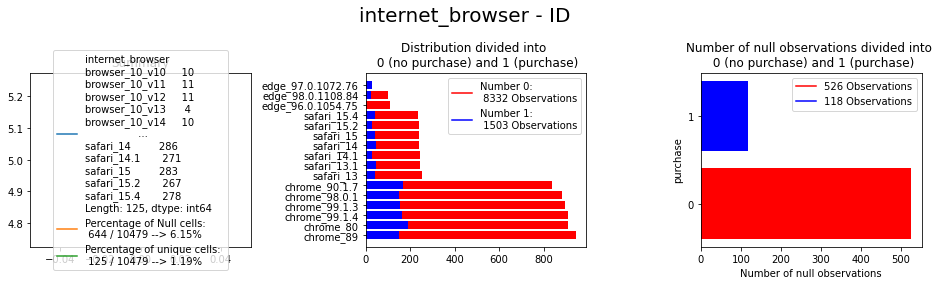

In [30]:
categorical_column_ID (data, train, "internet_browser")

#### Exploration on product_page_duration
As expected by the name - the feature is suitable for continuous distribution (75% unique value, most values are repeated a few times, expresses time). In pre-processing we will "clean" the phrase "minutes".

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


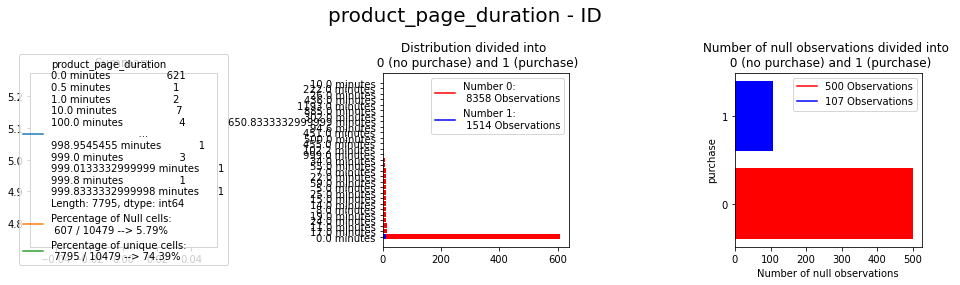

In [31]:
categorical_column_ID (data, train, "product_page_duration")

#### Exploration on info_page_duration

As expected by the name - the feature is suitable for continuous distribution (10% unique value, most values are repeated a few times, expresses time). In pre-processing we will "clean" the phrase "minutes".

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:142: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


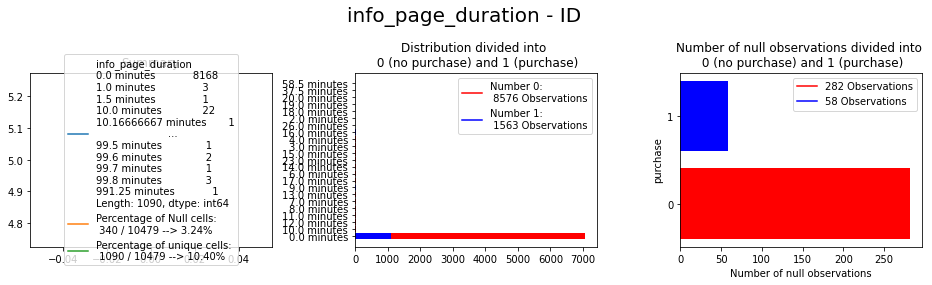

In [32]:
categorical_column_ID (data, train, "info_page_duration")

## Part B - Preprocessing

#### Convert to float

Based on the conclusions we presented in the exploration, we convert the columns "A", "info_page_duration", "product_page_duration" to numeric, by removing irrelevant expressions.

In [33]:
def to_float(text, start=None, end=None):
    try:
        return float(text[start:end])
    except TypeError:
        return text

In [34]:
def pre_to_float (df_in):
    df_in["product_page_duration"] = df_in["product_page_duration"].apply(to_float, end=-8)
    df_in["info_page_duration"] = df_in["info_page_duration"].apply(to_float, end=-8)
    df_in["A"] = df_in["A"].apply(to_float, start=2)
    return

pre_to_float (train)
pre_to_float (test)

#### Missing Value

As we mentioned before, we have missing values.


We  present some ways to deal with missing values.
After several attempts, and according to the meanings derived from the previous step, we decided to fill nulls by trying avoid bias :
* Numeric features - Fill missing values by KNN (10 neigbors) 
* Category features - Filled with missing vaules by the most frequent vaule.
* Currently, we decided to drop column D, due to large number of null values.
* Also, we decided to remove columns with a correlation higher than 80%.


In [35]:
# Deleting Missing Values - drop the entire column
def dropcol (df_in, col):
    df_in.drop(col, axis=1, inplace=True)
    return

# Deleting Missing Values- dropna
def dropna (df_in):
    df_in.dropna()
    return df_in

# Drop columns with high correlation
def drop_high_corr(df_in_train, df_in_test):
    # Create correlation matrix
    corr_matrix = df_in_train.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    # Find features with correlation greater than 0.8
    to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
    # Drop features 
    df_in_train.drop(to_drop, axis=1, inplace=True)
    df_in_test.drop(to_drop, axis=1, inplace=True)
    return

# Imputing Missing Values - fillna by mean (numerical)
def fillna_by_mean (df_in, col_name):
    col = df_in[col_name] 
    col_mean = col.mean()
    col.fillna(col_mean, inplace=True)
    return

# Imputing Missing Values - fillna by median (numerical)
def fillna_by_median (df_in, col_name):
    col = df_in[col_name] 
    col_median = col.median()
    col.fillna(col_median, inplace=True)
    return

# Imputing Missing Values - fillna by KNN (numerical)
def fillna_by_KNN (df_in_train, df_in_test, col_name, num):
    imputer = KNNImputer(n_neighbors=num)
    df_in_train[col_name] = pd.DataFrame(imputer.fit_transform(df_in_train[col_name]))
    df_in_test[col_name] = pd.DataFrame(imputer.transform(df_in_test[col_name])) 
    return

# Imputing Missing Values - fillna by most frequent (categorical)
def fillna_by_most_frequent (df_in_train, df_in_test, col_name):
    col_train = df_in_train[col_name]
    col_test = df_in_test[col_name] 
    col_freq_by_train = col_train.mode()
    col_train.fillna(col_freq_by_train[0], inplace=True)
    col_test.fillna(col_freq_by_train[0], inplace=True)
    return

#### Split the "internet_browser" column to "browser" and "version"

In [36]:
# sperate the internet_browser data to browser and version

def split_brower(df_in):
    df_in['internet_browser']=df_in['internet_browser'].str.replace('_v','.')
    df_in[['browser','version']]=df_in['internet_browser'].str.split('_',expand=True)
    df_in["version"]= df_in["version"].str.slice(0,2)
    to_drop = ["internet_browser", "version"]
    df_in.drop(to_drop, axis=1, inplace=True)
    return 

split_brower(train)
split_brower(test)

In [37]:
unique_browser = train["browser"].nunique()
unique_browser

4

In [38]:
# fill missing values in numeric columns by KNN 

col_to_KNN = ['product_page_duration','info_page_duration','admin_page_duration', 'num_of_admin_pages',
                'num_of_product_pages', 'num_of_info_pages', 'PageValues' ,'A', 'B', 'ExitRates', 'BounceRates']

fillna_by_KNN (train, test, col_to_KNN, 10)

# after we filled the missing values in "durations" columns - sum them and fill "total duration" column 
def sum_duration (df_in):
    sum_duration= df_in["admin_page_duration"] + df_in["info_page_duration"] + df_in["product_page_duration"]
    df_in["total_duration"]=df_in["total_duration"].fillna(sum_duration)
    return

sum_duration(train)
sum_duration(test)

#fill the categorical columns by most_frequent
col_to_most_frequent = ["closeness_to_holiday", "Month", "device", "C", "user_type", "Region", "Weekend", "browser"]

for i in range (len(col_to_most_frequent)):
    fillna_by_most_frequent (train, test, col_to_most_frequent[i])

# drop D
dropcol (train, "D")
dropcol (test, "D")

# drop columns with high correlation
drop_high_corr(train, test)

d:\ecommerce-machine-learning\venv\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [39]:
train.shape

(10479, 17)

In [40]:
test.shape

(1851, 17)

#### Maching the types of the data

In [41]:
data_types = {
    'category': [
        'closeness_to_holiday',
        'Month',
        'device',
        'C',
        'user_type',
        'Region',
        'Weekend',
        'browser'
    ],
    'float64': [
        'B',
        'product_page_duration',
        'BounceRates',
        'info_page_duration',
        'num_of_admin_pages',
        'num_of_info_pages',
        'admin_page_duration',
        'PageValues',
        'A'
    ]
}

for (key, value) in data_types.items():
    train = train.astype({v: key for v in value})
    test =  test.astype({v: key for v in value})
    


In [42]:
train.shape

(10479, 17)

In [43]:
test.shape

(1851, 17)

#### Categorical variables
We present two ways to deal with categorical features:
* Convert to binary columns.
* Convert to to numeric values.

We decided to convert all the categorical features to binary columns, assuming that running the models would be simpler and less biased. However, we aware that the number of features is increased.

In [44]:
def categorical_to_binary(df_in, col_name):
    frames = [df_in]
    for i in col_name:
        a = pd.get_dummies(df_in[i], prefix = i)
        frames.append(a)
    df_edited = pd.concat(frames, axis = 1)
    df_out = df_edited.drop(columns = col_name)
    return df_out

def categorical_to_numeric(df_in, col_name, curr_val, new_val):
    df_in[col_name].replace(to_replace=curr_val, value=new_val, inplace=True)
    return

train = categorical_to_binary (train, ["closeness_to_holiday", "device", "Region","Month", "C", "Weekend", "browser", "user_type"])
test = categorical_to_binary (test, ["closeness_to_holiday", "device", "Region","Month", "C", "Weekend", "browser", "user_type"])


For matching the existing features in the train set and the test set, the "device_5.0" feature was removed from the train set, because it does not exist in the test.

In [45]:
# drop "device_5.0"
dropcol (train, "device_5.0")

In [46]:
train.shape

(10479, 56)

In [47]:
test.shape

(1851, 56)

#### Standardization & Scaling

The data is not completely normalized - we have shown this before.
We would like to normalize the data for running models efficiently and not biased. For example, Gradient Descent-based algorithms, such Logistic Regression, SVMs, and Neural Networks, will optimize much slower if we will not normalize.


We present two ways for scaling:
* Standardization - Features will be rescaled so that they’ll have the properties of a standard normal distribution with u=0, sd=1. 
* Min-Max Scaling - Data is scaled to a fixed range - usually 0 to 1.
* Some of the data is normally distributed, and for most continuous columns there is no closed range of possible values. Hence, we decided to use Standardization


In [48]:
def scaling_minmax(df_in_train, df_in_test):
    # We initialize our scaler
    min_max_scaler = MinMaxScaler()
    # We fit our scaler
    min_max_scaler.fit(df_in_train)
    # We transform our X using the scaler we have just fit.
    scaled_train = min_max_scaler.transform(df_in_train)
    scaled_test = min_max_scaler.transform(df_in_test)
    return  pd.DataFrame(scaled_train), pd.DataFrame(scaled_test) 

def scaling_standard(df_in_train, df_in_test):
    # We initialize our scaler
    standard_scaler = StandardScaler()
    # We fit our scaler
    standard_scaler.fit(df_in_train)
    # We transform our data using the scaler we have just fit.
    scaled_train = standard_scaler.transform(df_in_train)
    scaled_test = standard_scaler.transform(df_in_test)
    return pd.DataFrame(scaled_train), pd.DataFrame(scaled_test) 

train, test = scaling_standard(train, test)


In [49]:
train.shape

(10479, 56)

In [50]:
test.shape

(1851, 56)

In [51]:
#Column concatenating, towards deleting outliers in all data concatenating
final_df = pd.concat([train, y], axis = 1)
final_df_test = test

#### Dimensionality Reduction

High dimensional data refers to a dataset in which the number of features p is larger than the number of observations N, often written as p >> N.

When the number of features in a dataset exceeds the number of observations, we will never have a deterministic answer.
In other words, it becomes impossible to find a model that can describe the relationship between the predictor variables and the response variable because we don’t have enough observations to train the model on.

There are rules of thumb for desirable ratio between thr number of features and the number of observations. One is that the squared number of features is the lower barrier to the number of observations required.

In our case (without PCA) the number of features is 56.
56 ^ 2 = 3136
And we have 10479 >  3136 observations in train set.


#### PCA

In order to reduce problem dimension , we run the PCA method with a requirement to explain 95% of the original variance.
Next, we will run the models on the data without PCA, and on the data with PCA, to test its contribution.

In [52]:
def PCA_method(df_in_train, df_in_test, n_components):
    # initialize PCA
    pca = PCA(n_components=n_components)
    # Fit the model with the data
    pca.fit(df_in_train)
    # apply the PCA on the data (or on new data)
    pca_result_train = pca.transform(df_in_train)
    pca_result_test = pca.transform(df_in_test)
    df_out_train = pd.DataFrame(data = pca_result_train)
    df_out_train = pd.DataFrame(df_out_train)
    df_out_test = pd.DataFrame(data = pca_result_test)
    df_out_test = pd.DataFrame(pca_result_test)
    return df_out_train, df_out_test 

train_pca = train.copy()
test_pca = test.copy()
train_pca, test_pca = PCA_method(train_pca, test_pca, 0.95)

In [53]:
final_df_pca = pd.concat([train_pca, y], axis = 1)
final_df_test_pca = test_pca

#### Outliers

As we saw in the previous step, there are outliers, and quite a few.
We will present some ways to handle the outliers, when in the bottom line, we decided to remove them using z-score function:
* For each column, compute the Z-score of each value in the column, relative to the column mean and standard deviation.
* Take the absolute of Z-score, and see if it larger than 5 standard deviations.
* all(axis=1) ensures that for each row, all column satisfy the constraint.
* Finally, result of this condition is used to index the DataFrame.

In [54]:
def remove_outliers_zscore(final_df, set_df, num_sd):
    df_out = final_df[(np.abs(stats.zscore(set_df)) < num_sd).all(axis=1)]
    return df_out

def remove_outliers_iqr(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

def remove_outliers_tails(df_in, col_name, L=0.05, U=0.05):
    lower = df_in[col_name].quantile(L)
    upper = df_in[col_name].quantile(1-U)
    df_out = df_in.loc[(df_in[col_name] > lower) & (df_in[col_name] < upper)]
    return df_out

def rows_selection(df_in, col_name, min_val=None, max_val=None):
    if min_val == None:
        min_val = df_in[col_name].min()
    if max_val == None:
        max_val=df_in[col_name].max()
    df_out = df_in[(df_in[col_name] >= min_val) & (df_in[col_name] <= max_val)]
    return df_out 

final_df = remove_outliers_zscore(final_df, train, 5)
final_df_pca = remove_outliers_zscore(final_df_pca, train_pca, 5)

# we want to drop rows with too long duration?
#train = rows_selection(train, "total_duration", min_val=None, max_val=1000)

In [55]:
final_df.shape

(6803, 57)

In [56]:
final_df_pca.shape

(10146, 43)

In [57]:
final_df_test.shape

(1851, 56)

In [58]:
final_df_test_pca.shape

(1851, 42)

### Redividing of the data

In [59]:
X = final_df.iloc[:,:-1].values
y = final_df.iloc[:,-1].values
X_pca = final_df_pca.iloc[:,:-1].values
y_pca = final_df_pca.iloc[:,-1].values

## Part C - Running the models

We'll start by splitting the data into training and testing:

In [60]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=0, shuffle=True)
X_pca_train, X_pca_validate, y_pca_train, y_pca_validate = train_test_split(X_pca, y_pca, random_state=0, shuffle=True)

Between KNN & Logistic Regression, we chose to implement **Logistic Regression**:

In [61]:
# Logistic Regression:
lgrParametersOptions = {
  'penalty': ['l1', 'l2'],
  'tol': [1e-4, 1e-3, 1e-2],
  'C': [0.01, 0.1, 1],
  'solver': ['liblinear'],
  'max_iter': [1000],
} 
lgr_gs_regular = GridSearchCV(LogisticRegression(random_state=0), lgrParametersOptions, scoring='roc_auc', verbose=1)
lgr_gs_pca = GridSearchCV(LogisticRegression(random_state=0), lgrParametersOptions, scoring='roc_auc', verbose=1)
lgr_gs_regular.fit(X_train, y_train)
lgr_gs_pca.fit(X_pca_train, y_pca_train)
print('-'*30)
print ('Regular Logistic Regression chosen parameters (recieved best AUC): {}'.format(lgr_gs_regular.best_params_))
print ("Regular Logistic Regression AUC score with the chosen parameters: ", lgr_gs_regular.best_score_)
print('-'*30)
print ('PCA Logistic Regression chosen parameters (recieved best AUC): {}'.format(lgr_gs_pca.best_params_))
print ("PCA Logistic Regression AUC score with the chosen parameters: ", lgr_gs_pca.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
------------------------------
Regular Logistic Regression chosen parameters (recieved best AUC): {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
Regular Logistic Regression AUC score with the chosen parameters:  0.9078311739906807
------------------------------
PCA Logistic Regression chosen parameters (recieved best AUC): {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}
PCA Logistic Regression AUC score with the chosen parameters:  0.8922247616661713


Between:

1. ANN
2. Decision Tree
3. Random Forest or Adaptive Boosting
4. Support Vectors Machine

We chose - ANN, Decision Tree & Random Forest:

In [62]:
# ANN:
annParametersOptions = {
  'activation' : ["relu", "logistic"],
  'hidden_layer_sizes' : [(100,), (50, 50), (20, 20, 10, 10, 10)],
  'alpha': [0.01, 0.1],
  'learning_rate_init' : [0.1, 0.01],
  'max_iter' : [500],
  'random_state': [0],
}

ann_gs_regular = GridSearchCV(MLPClassifier(random_state=0, shuffle=True), annParametersOptions, scoring='roc_auc', verbose=1)
ann_gs_pca = GridSearchCV(MLPClassifier(random_state=0, shuffle=True), annParametersOptions, scoring='roc_auc', verbose=1)

ann_gs_regular.fit(X_train, y_train)
ann_gs_pca.fit(X_pca_train, y_pca_train)
print('-'*30)
print ('Regular Neural Network chosen parameters (recieved best AUC): {}'.format(ann_gs_regular.best_params_))
print ("Regular Neural Network AUC score with the chosen parameters: ", ann_gs_regular.best_score_)
print('-'*30)
print ('PCA Neural Network chosen parameters (recieved best AUC): {}'.format(ann_gs_pca.best_params_))
print ("PCA Neural Network AUC score with the chosen parameters: ", ann_gs_pca.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
------------------------------
Regular Neural Network chosen parameters (recieved best AUC): {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 0}
Regular Neural Network AUC score with the chosen parameters:  0.9031424948254015
------------------------------
PCA Neural Network chosen parameters (recieved best AUC): {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1, 'max_iter': 500, 'random_state': 0}
PCA Neural Network AUC score with the chosen parameters:  0.8973806392307309


In [63]:
# Decision Tree:
dtParametersOptions = {
  'criterion': ['gini', 'entropy'],
  'splitter': ['best', 'random'],
  'max_depth': [None, 50, 100],
  'max_features': [None, 'sqrt', 'log2']
}

dt_gs_regular = GridSearchCV(DecisionTreeClassifier(random_state=0), dtParametersOptions, scoring='roc_auc', verbose=1)
dt_gs_pca = GridSearchCV(DecisionTreeClassifier(random_state=0), dtParametersOptions, scoring='roc_auc', verbose=1)

dt_gs_regular.fit(X_train, y_train)
dt_gs_pca.fit(X_pca_train, y_pca_train)
print('-'*30)
print ('Regular Decision Tree chosen parameters (recieved best AUC): {}'.format(dt_gs_regular.best_params_))
print ("Regular Decision Tree AUC score with the chosen parameters: ", dt_gs_regular.best_score_)
print('-'*30)
print ('PCA Decision Tree chosen parameters (recieved best AUC): {}'.format(dt_gs_pca.best_params_))
print ("PCA Decision Tree AUC score with the chosen parameters: ", dt_gs_pca.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
------------------------------
Regular Decision Tree chosen parameters (recieved best AUC): {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'splitter': 'best'}
Regular Decision Tree AUC score with the chosen parameters:  0.721673658218559
------------------------------
PCA Decision Tree chosen parameters (recieved best AUC): {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'splitter': 'best'}
PCA Decision Tree AUC score with the chosen parameters:  0.671094585947475


In [64]:
# Random Forest:
rfParametersOptions = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [25, 50],
  'max_features': ['sqrt', 'log2']
}

rf_gs_regular = GridSearchCV(RandomForestClassifier(random_state=0), rfParametersOptions, scoring='roc_auc', verbose=1)
rf_gs_pca = GridSearchCV(RandomForestClassifier(random_state=0), rfParametersOptions, scoring='roc_auc', verbose=1)

rf_gs_regular.fit(X_train, y_train)
rf_gs_pca.fit(X_pca_train, y_pca_train)
print('-'*30)
print ('Regular Random Forest chosen parameters (recieved best AUC): {}'.format(rf_gs_regular.best_params_))
print ("Regular Random Forest AUC score with the chosen parameters: ", rf_gs_regular.best_score_)
print('-'*30)
print ('PCA Random Forest chosen parameters (recieved best AUC): {}'.format(rf_gs_pca.best_params_))
print ("PCA Random Forest AUC score with the chosen parameters: ", rf_gs_pca.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
------------------------------
Regular Random Forest chosen parameters (recieved best AUC): {'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt'}
Regular Random Forest AUC score with the chosen parameters:  0.9132381719936731
------------------------------
PCA Random Forest chosen parameters (recieved best AUC): {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt'}
PCA Random Forest AUC score with the chosen parameters:  0.8692396803746932


We also tried using SVM, but we've reached problematic results at best, so we decided to use a Decision Tree model instead.

In [65]:
# SVM:
# svmParametersOptions = {
#   'C': [1, 10, 100],
#   'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
#   'tol': [1e-3, 1e-4, 1e-5],
#   'max_iter': [10, 100, 200]
# }

# svm_clf = GridSearchCV(svm.SVC(), svmParametersOptions, cv=3, scoring='roc_auc')

# svm_clf.fit(X_train, y_train)
# print ('SVM chosen parameters (recieved best AUC): {}'.format(svm_clf.best_params_))
# print ("SVM AUC score with the chosen parameters: ", svm_clf.best_score_)

## Part D - Models Evaluation:


The task is to build a confusion matrix for one of the models & explain what each cell means.
For it we will use our LogisticRegression model:

The train+validate score is: 0.91725844035343


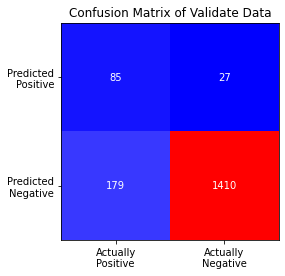

In [66]:
lgr_prediction = lgr_gs_regular.predict(X_validate)
cm = confusion_matrix(y_validate, lgr_prediction)
tn, fp, fn, tp = cm.ravel()

cm_tv= np.array([[tp,fp],[fn,tn]])

# Add labels for the matrix's plot:
predictions = ['Predicted\nPositive', 'Predicted\nNegative']
actualls = ['Actually\nPositive', 'Actually\nNegative']

fig, ax = plt.subplots()
im = ax.imshow(cm_tv, cmap='bwr')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(actualls)))
ax.set_xticklabels(actualls)
ax.set_yticks(np.arange(len(predictions)))
ax.set_yticklabels(predictions)

# Loop over data dimensions and create text annotations.
for i in range(len(predictions)):
    for j in range(len(actualls)):
        text = ax.text(j, i, cm_tv[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Confusion Matrix of Validate Data")

train_score_matrix = lgr_gs_regular.score(X_validate, y_validate)
print(f'The train+validate score is: {train_score_matrix}')

plt.show()

The top left cell is TP - It means how many times did the model predict a purchase and it was correct.

The top right cell is FP - The amount of times the model predicted a purchase and it was wrong.

The bottom left cell is FN - The amount of times the model predicted there won't be a purchase and there was.

The bottom right cell is TP - The amount of times the model predicted there won't be a purchase and there wasn't.

Our model got an 91% percent of guessing correctly on the train & validate data, which is okay, but we can see it has a bigger chance of getting a FN than a TP, which means we are missing more purchases than we actually may have.

Now we'll evaluate our models using a K-Fold Cross Validation:

In [67]:
def KfoldPlot(X, y, clf, k, ax, clfname, type, color='r'):
    # initializes the KFOLD

    kf = KFold(n_splits=k, random_state=0, shuffle=True) 

    # sets an mean tpr and fpr.
    mean_tpr = np.zeros(200) 
    mean_fpr = np.linspace(0, 1, 200) # range of 200 valuves of axis x - fpr (at equal intervals)

    i = 1
    
    # iterates over each fold
    for train_index, validation_index in kf.split(X):          

        # Splits to train and validation 
        X_train, X_validation = X[train_index], X[validation_index]
        y_train, y_validation = y[train_index], y[validation_index]
        
        # fits with X_train and y_train.
        clf.fit(X_train, y_train)

        # predicts by the probability of the vaulue "1" (not "0")
        prob_prediction = clf.predict_proba(X_validation)[:,1]
        
        # calculates ROC curve 
        fpr, tpr, thresholds = roc_curve(y_validation, prob_prediction)
        
        # adds the corresponding tpr values to the current ROC curve 
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0 # the left tail of the range
        
        # plots the current ROC of current fold with the color #E5E5E5
        ax.plot(fpr, tpr, color='#E5E5E5')
        i+=1
     
    # adds legend of "K-folds"
    ax.plot([0], [0], color='#E5E5E5', linestyle='-', label='K-folds') 
    
    # calculates the average of tpr values
    mean_tpr /= k
    mean_tpr[-1] = 1.0 #the right tail of the range
    mean_auc = auc(mean_fpr, mean_tpr) # the area under the ROC curve
    
    # plots the random-guess line 
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    # plots the mean roc - a magenta line.
    ax.plot(mean_fpr, mean_tpr, color=color, linestyle='-', label='Mean ROC (area = %0.3f)' % mean_auc)
    
    #Setting the graph.
       
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC for {clfname} on {type}') 
    ax.legend()

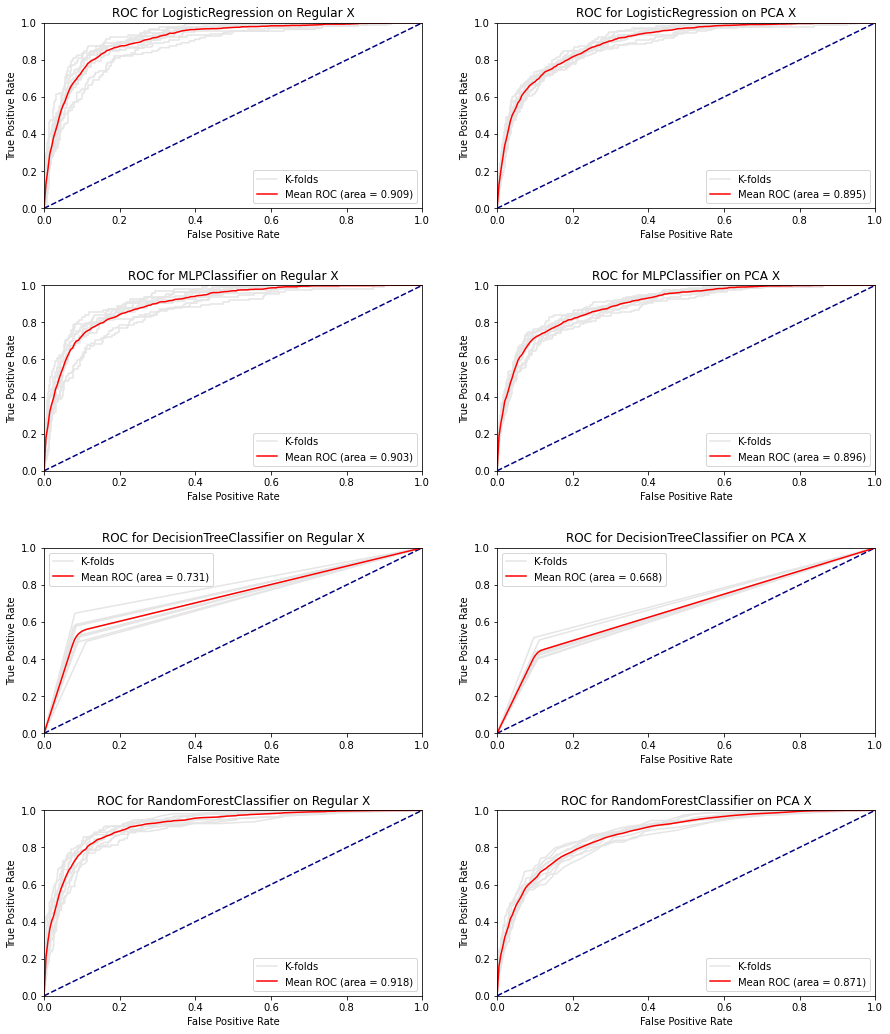

In [68]:
# Create the models:
lgr_clf_regular = LogisticRegression(random_state=0).set_params(**lgr_gs_regular.best_params_)
lgr_clf_pca = LogisticRegression(random_state=0).set_params(**lgr_gs_pca.best_params_)

ann_clf_regular = MLPClassifier(random_state=0).set_params(**ann_gs_regular.best_params_)
ann_clf_pca = MLPClassifier(random_state=0).set_params(**ann_gs_pca.best_params_)

dt_clf_regular = DecisionTreeClassifier(random_state=0).set_params(**dt_gs_regular.best_params_)
dt_clf_pca = DecisionTreeClassifier(random_state=0).set_params(**dt_gs_pca.best_params_)

rf_clf_regular = RandomForestClassifier(random_state=0).set_params(**rf_gs_regular.best_params_)
rf_clf_pca = RandomForestClassifier(random_state=0).set_params(**rf_gs_pca.best_params_)


models = [
    [lgr_clf_regular, lgr_clf_pca],
    [ann_clf_regular, ann_clf_pca],
    [dt_clf_regular, dt_clf_pca],
    [rf_clf_regular, rf_clf_pca]
]

Xs = [X, X_pca]
ys = [y, y_pca]

types = ['Regular X', 'PCA X']

fig, axs = plt.subplots(figsize=(13, 15), nrows=4, ncols=2)

for i in range(len(models)):
    # returns the name of the classifier
    for j in range(2):
        clf = models[i][j] 
        clfname = str(clf)[:str(clf).find("(")]
        KfoldPlot(Xs[j], ys[j], models[i][j], 10, axs[i, j], clfname, types[j])
        
plt.tight_layout(pad=3.0)
plt.show()


Differences between Train & Validation for every model:

In [69]:
def Score_By_K_fold(X, y, clf, k):

    if_over_fitting = [[],[],[]]

    kf = KFold(n_splits=k, random_state=0, shuffle=True) 

    # iterates over each fold
    for train_index, validation_index in kf.split(X):          

        # Splits to train and validation 
        X_train, X_validation = X[train_index], X[validation_index]
        y_train, y_validation = y[train_index], y[validation_index]
        
        # fits with X_train and y_train.
        clf.fit(X_train, y_train)

        train_score = clf.score(X_train, y_train)
        validate_score = clf.score(X_validation, y_validation)
        dif_ratio = abs(train_score - validate_score) / train_score
        
        if_over_fitting[0].append(train_score)
        if_over_fitting[1].append(validate_score)
        if_over_fitting[2].append(dif_ratio)

    mean_train_score = sum(if_over_fitting[0])/k
    mean_validate_score = sum(if_over_fitting[1])/k
    mean_dif_ratio = sum(if_over_fitting[2])/k

    return mean_train_score, mean_validate_score, mean_dif_ratio

performance_cols = ['Model Name', 'Model', 'Train', 'Validation', 'Difference']

performance_df = pd.DataFrame(columns=performance_cols)

for i in range(len(models)):
    for j in range(2):
        clf = models[i][j]
        clfname = f'{str(clf)[:str(clf).find("(")]} {types[j]}'
        mean_train_score, mean_validate_score, mean_dif_ratio = Score_By_K_fold (Xs[j], ys[j], models[i][j], 10)
        d = {
          performance_cols[0]: clfname,
          performance_cols[1]: clf,
          performance_cols[2]: mean_train_score,
          performance_cols[3]: mean_validate_score,
          performance_cols[4]: mean_dif_ratio
        } 
        performance_df = performance_df.append(d, ignore_index=True)

performance_df


,Model Name,Model,Train,Validation,Difference
0,LogisticRegression Regular X,"LogisticRegression(C=0.01, max_iter=1000, pena...",0.876999,0.876230,0.010155
1,LogisticRegression PCA X,"LogisticRegression(C=0.01, max_iter=1000, rand...",0.882548,0.881528,0.007206
2,MLPClassifier Regular X,"MLPClassifier(activation='logistic', alpha=0.1...",0.891143,0.888134,0.009886
3,MLPClassifier PCA X,"MLPClassifier(activation='logistic', alpha=0.1...",0.892076,0.885768,0.008471
4,DecisionTreeClassifier Regular X,"DecisionTreeClassifier(criterion='entropy', ra...",1.000000,0.853885,0.146115
5,DecisionTreeClassifier PCA X,DecisionTreeClassifier(random_state=0),1.000000,0.825253,0.174747
6,RandomForestClassifier Regular X,"(DecisionTreeClassifier(criterion='entropy', m...",0.999918,0.893278,0.106649
7,RandomForestClassifier PCA X,"(DecisionTreeClassifier(criterion='entropy', m...",0.999989,0.877980,0.122010


We've decided that if the Difference value is greater than 3% - Then the models suffers from overfitting, and as such - we'll treat it as an invalid model and pick the model with the best Validation score.

In [70]:
no_overfitting_df = performance_df[performance_df['Difference'] < 0.03].sort_values(by='Validation', ascending=False)
no_overfitting_df
best_model = no_overfitting_df[no_overfitting_df['Validation'] == no_overfitting_df['Validation'].max()]
best_model

,Model Name,Model,Train,Validation,Difference
2,MLPClassifier Regular X,"MLPClassifier(activation='logistic', alpha=0.1...",0.891143,0.888134,0.009886


## Part E - Prediction

Now, when we know that the "Random Forest" model is the best, we will do the preprocessing on the test set.

Runnig the model and predicting:

In [71]:
best_clf = best_model["Model"].iloc[0]

best_clf.fit(X, y)
predictions = best_clf.predict_proba(final_df_test)[:,1]
predictions

array([0.30886497, 0.07429555, 0.08720733, ..., 0.02158093, 0.02887573,
       0.65642972])

In [72]:
# Export the prediction results to the svc file

id = test_data.iloc[:,0]
pred_df = pd.DataFrame()
pred_df['id'] = id
pred_df['predict_prob'] = predictions
pred_df.to_csv("Submission_group_7.csv", index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

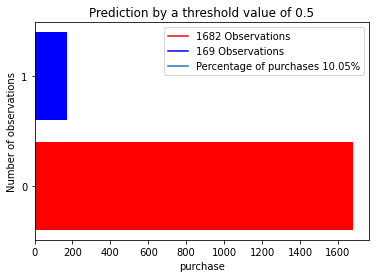

In [73]:
# plot the prediction results - values below 0.5 will be classified as 0, and above - as 1.

test_zeros = pred_df[(pred_df["predict_prob"] <= 0.5)].shape[0]
test_ones = pred_df[(pred_df["predict_prob"] > 0.5)].shape[0]
test_ratio = (test_ones/test_zeros*100)

names = ['0', '1']
values = [test_zeros, test_ones]
plt.barh(names, values, color=['red','blue'])
plt.plot([0, 0], [0, 0], color='red', linestyle='-', label='%d Observations' % test_zeros)
plt.plot([0, 0], [0, 0], color='blue', linestyle='-', label='%d Observations' % test_ones)
plt.plot([0, 0], [0, 0], label='Percentage of purchases %.2f' % test_ratio + '%')
plt.xlabel('purchase')
plt.ylabel('Number of observations')
plt.title('Prediction by a threshold value of 0.5') 
plt.legend()
plt.show

In [74]:
print(f"Total running time {(time.time() - start_time):.2f} seconds")

Total running time 1280.80 seconds
